# Looking at the Answerable TyDi QA dataset

Imports

In [10]:
from datasets import load_dataset

Load dataset

In [11]:
dataset = load_dataset("copenlu/answerable_tydiqa")
train_set = dataset["train"]
validation_set = dataset["validation"]

Let's look at some statistics


In [12]:
# Define the languages of interest
languages = ["arabic", "bengali", "indonesian"]

In [18]:

# Initialize dictionaries to store statistics for each language
statistics = {}

# Loop through each language
for language in languages:
    # Get the training and validation data for the current language
    train_set = dataset["train"].filter(lambda example: example["language"] == language)
    validation_set = dataset["validation"].filter(lambda example: example["language"] == language)
    
    # Calculate basic statistics for training data
    num_train_examples = len(train_set)
    num_train_contexts = len(set(train_set["document_title"]))
    num_train_questions = len(set(train_set["question_text"]))
    train_doc_lenghts = [len(document) for document in train_set["document_plaintext"]]
                                                
    # Calculate basic statistics for validation data
    num_validation_examples = len(validation_set)
    num_validation_contexts = len(set(validation_set["document_title"]))
    num_validation_questions = len(set(validation_set["question_text"]))
    validation_doc_lenghts = [len(document) for document in validation_set["document_plaintext"]]
    
    # Store the statistics
    statistics[language] = {
        "Train Data": {
            "Number of Examples": num_train_examples,
            "Number of Documents": num_train_contexts,
            "Number of Questions": num_train_questions,
            "Document lengths": {
                "Minimum": min(train_doc_lenghts),
                "Maximum": max(train_doc_lenghts),
                "Average": sum(train_doc_lenghts) / num_train_examples
            },
        },
        "Validation Data": {
            "Number of Examples": num_validation_examples,
            "Number of Documents": num_validation_contexts,
            "Number of Questions": num_validation_questions,
            "Document lengths": {
                "Minimum": min(validation_doc_lenghts),
                "Maximum": max(validation_doc_lenghts),
                "Average": sum(validation_doc_lenghts) / num_validation_examples
            },
        }
    }

# Print the statistics
for language, stats in statistics.items():
    print(f"Statistics for {language.capitalize()} language:")
    for split, values in stats.items():
        print(f"{split}:")
        for stat_name, value in values.items():
            print(f"{stat_name}: {value}")
        print()

Statistics for Arabic language:
Train Data:
Number of Examples: 29598
Number of Documents: 8527
Number of Questions: 14805
Document lengths: {'Minimum': 9, 'Maximum': 22636, 'Average': 474.58760727076157}

Validation Data:
Number of Examples: 1902
Number of Documents: 812
Number of Questions: 951
Document lengths: {'Minimum': 16, 'Maximum': 8674, 'Average': 423.8958990536278}

Statistics for Bengali language:
Train Data:
Number of Examples: 4779
Number of Documents: 1126
Number of Questions: 2376
Document lengths: {'Minimum': 12, 'Maximum': 7218, 'Average': 554.5662272441933}

Validation Data:
Number of Examples: 224
Number of Documents: 90
Number of Questions: 112
Document lengths: {'Minimum': 40, 'Maximum': 3498, 'Average': 562.0535714285714}

Statistics for Indonesian language:
Train Data:
Number of Examples: 11394
Number of Documents: 3273
Number of Questions: 5702
Document lengths: {'Minimum': 16, 'Maximum': 22351, 'Average': 529.9210110584518}

Validation Data:
Number of Examples

Let's visualize it

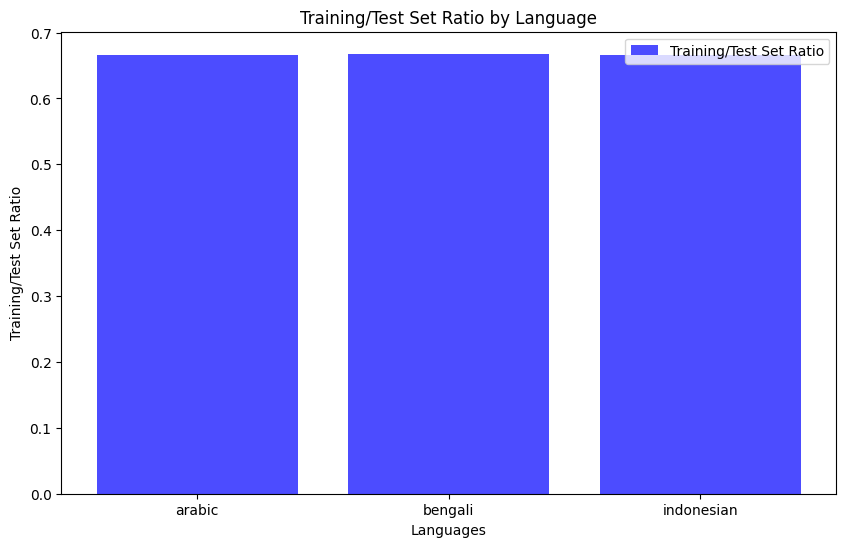

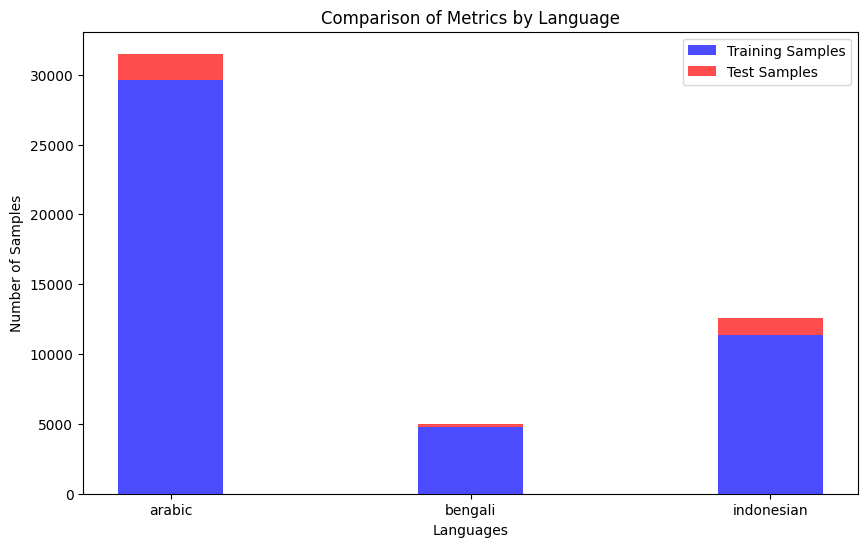

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the training/test set ratios and number of samples for each language
training_ratios = [stats["Train Data"]["Number of Examples"] / (stats["Train Data"]["Number of Examples"] + stats["Train Data"]["Number of Questions"]) for stats in statistics.values()]
num_samples = [stats["Train Data"]["Number of Examples"] for stats in statistics.values()]


# Create a bar plot for the training/test set ratio for each language
plt.figure(figsize=(10, 6))
plt.bar(languages, training_ratios, color='b', alpha=0.7)
plt.title('Training/Test Set Ratio by Language')
plt.ylabel('Training/Test Set Ratio')
plt.xlabel('Languages')
plt.legend(['Training/Test Set Ratio'])
plt.show()
# Create a composite bar plot for both metrics for each language
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(languages))

# Plot the training samples
plt.bar(index, num_samples, bar_width, label='Training Samples', color='b', alpha=0.7)

# Plot the test samples on top of the training samples
plt.bar(index, [stats["Validation Data"]["Number of Examples"] for stats in statistics.values()], bar_width, label='Test Samples', bottom=num_samples, color='r', alpha=0.7)

plt.xlabel('Languages')
plt.ylabel('Number of Samples')
plt.title('Comparison of Metrics by Language')
plt.xticks(index, languages)
plt.legend()
plt.show()

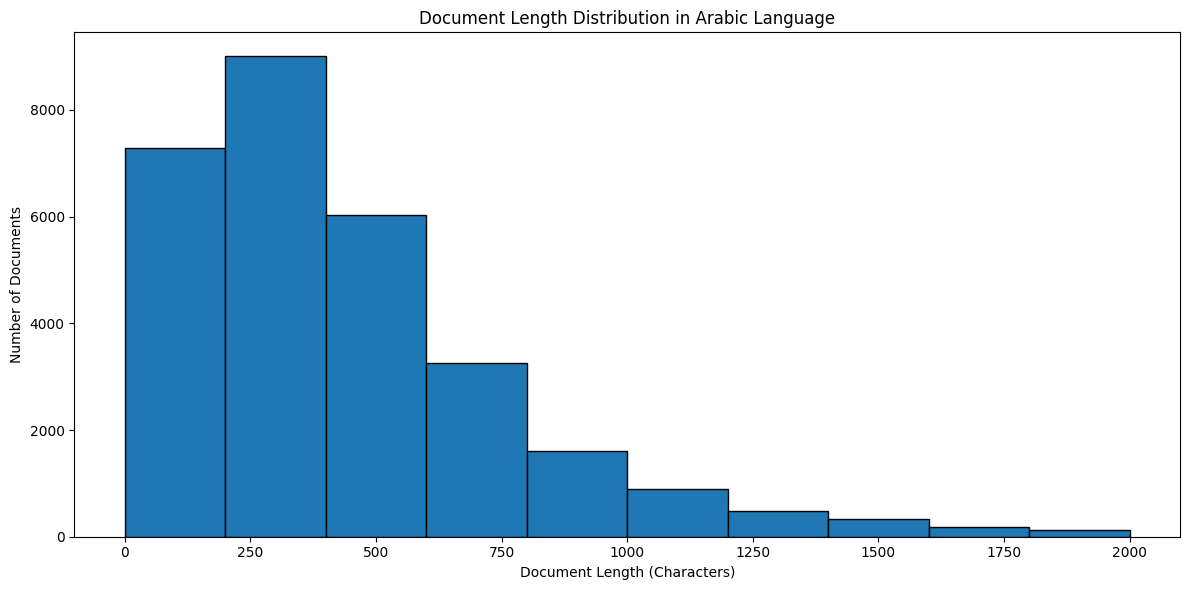

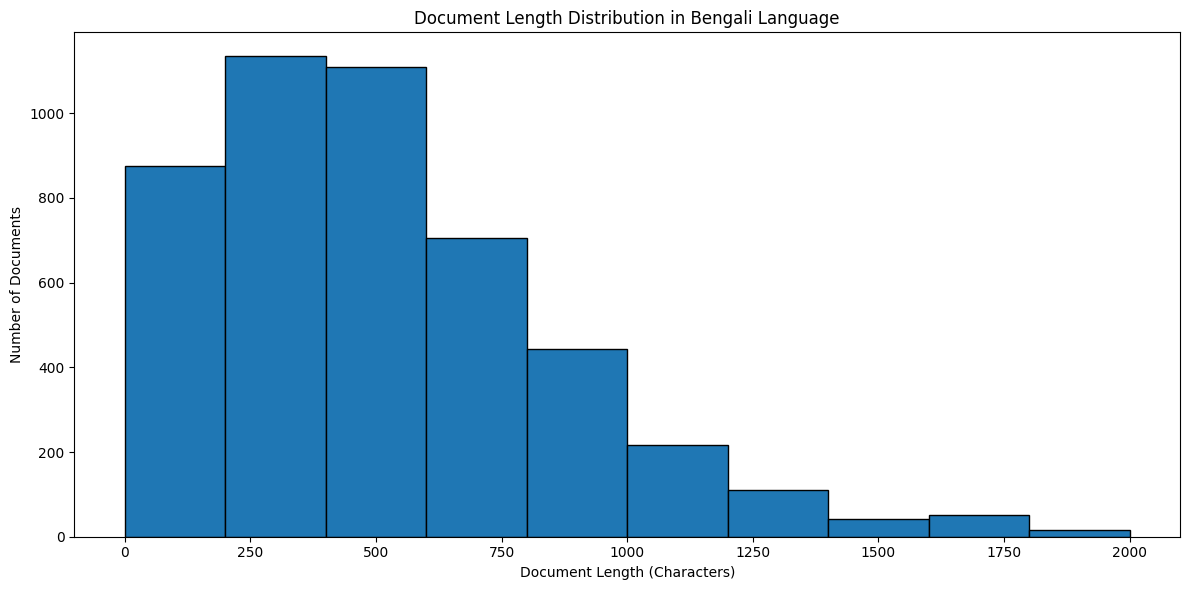

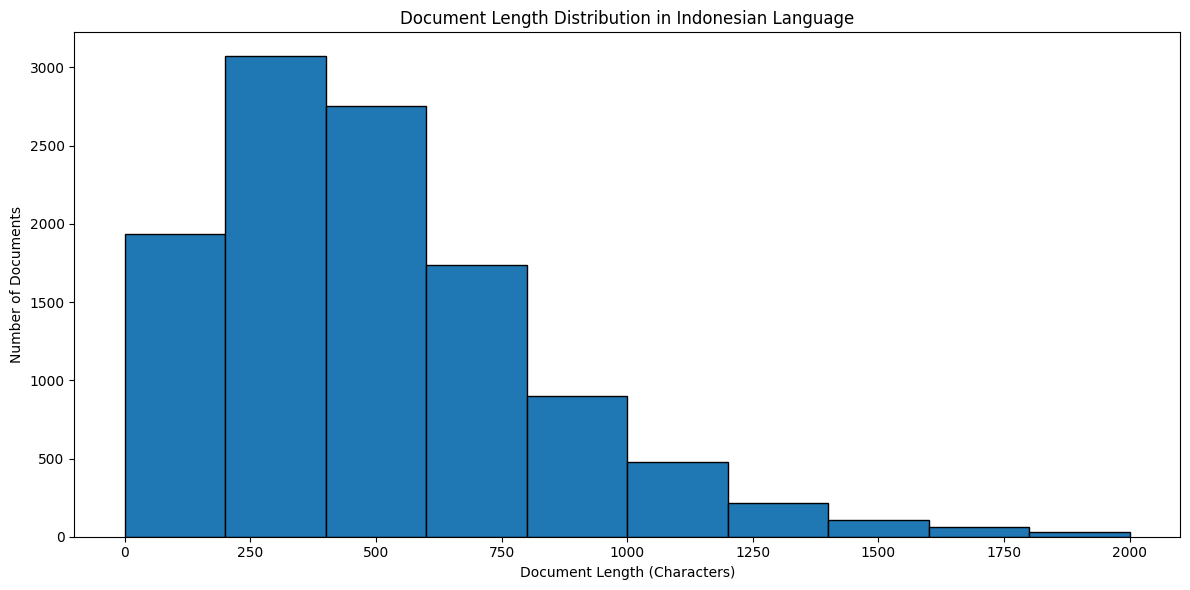

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset

# Load the TyDi QA dataset
dataset = load_dataset("copenlu/answerable_tydiqa")

# Define the languages of interest
languages = ["arabic", "bengali", "indonesian"]

# Initialize dictionaries to store document lengths for each language
document_lengths = {}

# Define the bucket boundaries
buckets = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

# Calculate document lengths and store them in the dictionary for each language
for language in languages:
    train_set = dataset["train"].filter(lambda example: example["language"] == language)
    document_lengths[language] = [len(doc) for doc in train_set["document_plaintext"]]

# Create subplots for each language
for language in languages:
    plt.figure(figsize=(12, 6))
    
    # Plot the bucket histogram
    plt.hist(document_lengths[language], bins=buckets, edgecolor='black')
    
    # Set labels and title
    plt.xlabel('Document Length (Characters)')
    plt.ylabel('Number of Documents')
    plt.title(f'Document Length Distribution in {language.capitalize()} Language')
 
    # Show the plot
    plt.tight_layout()
    plt.show()


Statistics on words

In [16]:

from collections import Counter


def top_n_common_words(data, column_name, n):
    # Combine all text data in the specified column into a single string
    text = ' '.join(data[column_name])
    
    # Tokenize the text into words (you may need to use a more advanced tokenizer based on your data)
    words = text.split()
    
    # Count the occurrences of each word
    word_counts = Counter(words)
    
    # Get the top N most common words
    top_words = word_counts.most_common(n)
    
    return top_words

In [17]:
top_n=5
for language in languages:
    print(f"\n---------- {language} top {top_n} words ------------")
    # Top n words in 'question_text' column
    train_set = dataset["train"].filter(lambda example: example["language"] == language)
    top_question_words = top_n_common_words(train_set, 'question_text', top_n)
    print(f"Top {top_n} words in 'question_text' column:")
    for word, count in top_question_words:
        print(f"{word}: {count}")
        
    # Top n words in 'document_plaintext' column
    top_document_words = top_n_common_words(train_set, 'document_plaintext', top_n)
    print(f"\nTop {top_n} words in 'document_plaintext' column:")
    for word, count in top_document_words:
        print(f"{word}: {count}")


---------- arabic top 5 words ------------
Top 5 words in 'question_text' column:
؟: 9707
ما: 7445
متى: 7130
هو: 6758
من: 6305

Top 5 words in 'document_plaintext' column:
في: 89425
من: 61371
على: 27931
إلى: 22046
عام: 13393

---------- bengali top 5 words ------------
Top 5 words in 'question_text' column:
?: 4775
কী: 940
নাম: 837
কত: 802
হয়: 800

Top 5 words in 'document_plaintext' column:
ও: 5170
এবং: 5098
এই: 3344
তিনি: 2902
থেকে: 2455

---------- indonesian top 5 words ------------
Top 5 words in 'question_text' column:
?: 3719
yang: 1814
Kapan: 1811
Apa: 1633
Apakah: 1227

Top 5 words in 'document_plaintext' column:
yang: 23886
dan: 23677
di: 16530
dari: 9711
dengan: 9052
